<a href="https://colab.research.google.com/github/arindm007/CropPredictAC/blob/main/CropPredictionAndAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

##About Dataset
#Context
Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

#Context
This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

#Data fields
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm


Dateset collected from kaggle.com




In [ ]:
# upload the csv file in colab and read the data
df = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


# Goal 🎯
To recommend optimum crops to be cultivated by farmers based on several parameters and help them make an informed decision before cultivation

To build a crop recommendation system, the goal would be to predict which crop is best suited based on environmental factors such as soil nutrients, temperature, humidity, pH, and rainfall. Here’s a step-by-step approach to guide you through this process:

## Steps to Build a Crop Recommendation System
### 1. Data Preprocessing and visualization
Ensure the data is clean, and there are no missing values.
Normalize or standardize the environmental factors (like temperature, pH, etc.) to bring them to the same scale.
### 2. Feature Selection
Use the features such as N, P, K, temperature, humidity, pH, and rainfall as input.
The label (crop) will be your target variable to predict.
### 3. Model Selection
We can apply machine learning classification algorithms to recommend crops. Some common algorithms include:
* Random Forest Classifier
* Decision Tree Classifier
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)
* Logistic Regression

### 4. Model Training
* Split the dataset into training and test sets (e.g., 80% training, 20% testing).
* Train your model on the training set and evaluate it on the test set.

### 5. Model Evaluation
* Use metrics like accuracy, precision, recall, F1-score, and confusion matrix to assess the model's performance.
* we can also use cross-validation to avoid overfitting and get more reliable results.

#### NOTE : Skipped model deployment step
### 6. Model Deployment
Once the model is trained and evaluated, you can deploy it to recommend crops based on user input (environmental parameters).

In [ ]:
# initial analysis

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
# to find unique crops in the dataset
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


# Visualization

Analysis and Visualization:

### 1.Correlation Heatmap:

A heatmap showing correlations between environmental factors like N, P, K, temperature, humidity, pH, and rainfall.
### 2.Crop Distribution:

Bar plot showing the distribution of different crops in the dataset.
### 3.Soil Nutrient Distribution:

Boxplots or histograms for nitrogen, phosphorus, and potassium levels across different crops.
### 4.Temperature and Humidity vs Crop:

Scatter plot of temperature and humidity colored by crop type to visualize how crops cluster based on these factors.
### 5.Rainfall and pH for Crop Suitability:

Plot rainfall against pH to see how crops vary with these conditions.

### 6. Distribution of the data among the continuous values

In [ ]:
# vislualization and geting some insights from the data

## Distribution of the data among the continuous values

<ipython-input-22-bbf93b0e9bb0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=ax[0],kde=True)


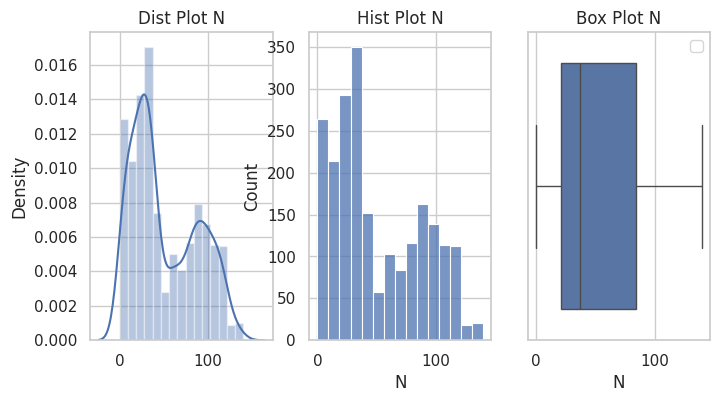

<ipython-input-22-bbf93b0e9bb0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=ax[0],kde=True)


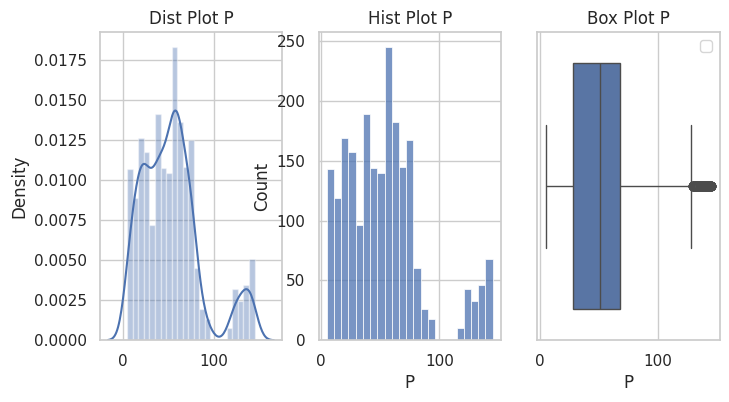

<ipython-input-22-bbf93b0e9bb0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=ax[0],kde=True)


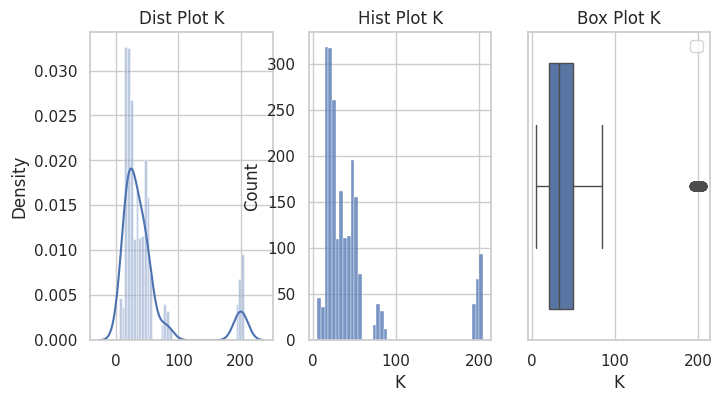

<ipython-input-22-bbf93b0e9bb0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=ax[0],kde=True)


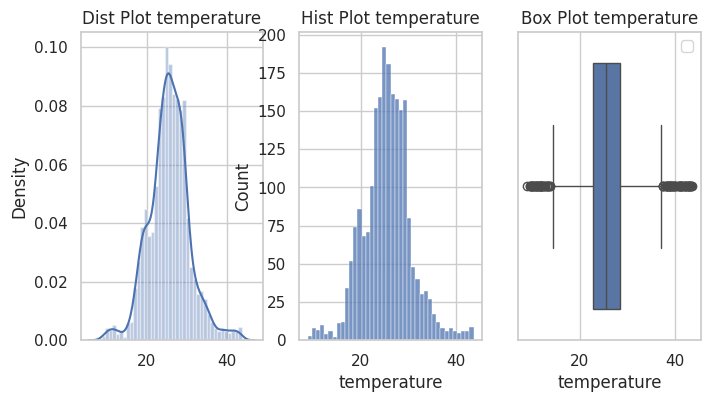

<ipython-input-22-bbf93b0e9bb0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=ax[0],kde=True)


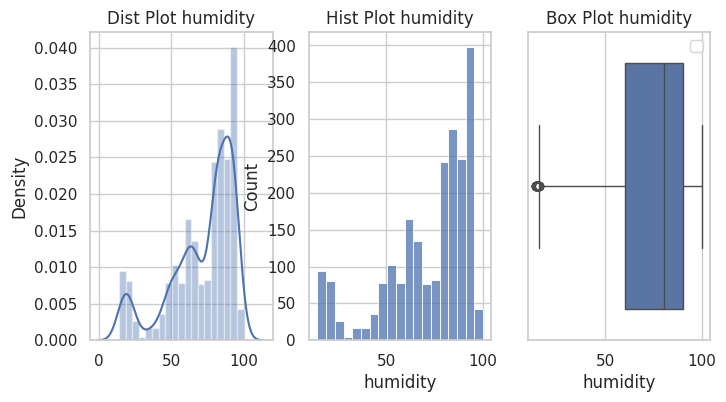

<ipython-input-22-bbf93b0e9bb0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=ax[0],kde=True)


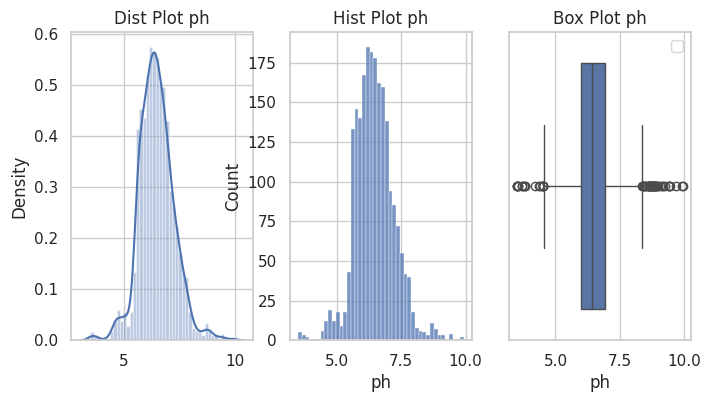

<ipython-input-22-bbf93b0e9bb0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=ax[0],kde=True)


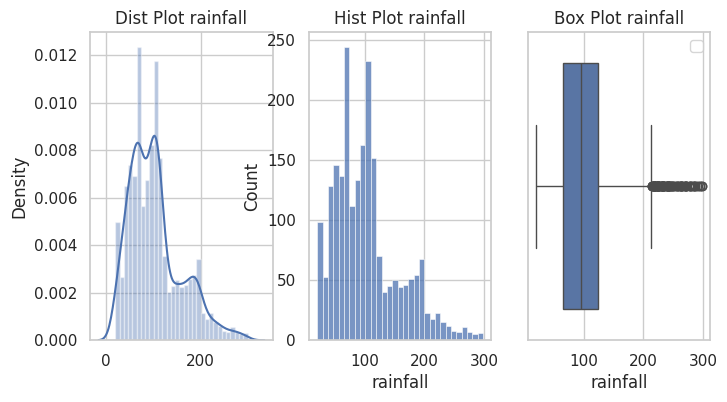

In [ ]:
# Distribution of the data among the continuous values
cols = df.columns
## iterate over the columns and then make the plot
for i in cols[:-1]:
    fig,ax = plt.subplots(1,3,figsize=(8,4))
    sns.distplot(x=df[i],ax=ax[0],kde=True)
    ax[0].set_title("Dist Plot "+i)
    sns.histplot(x=df[i],ax=ax[1])
    ax[1].set_title("Hist Plot "+i)
    sns.boxplot(data=df,x=i,ax=ax[2])
    ax[2].set_title("Box Plot "+i)
    plt.legend()
    plt.show()

## Soil Nutrient Distribution
### Boxplot showing the distribution of nitrogen (N), phosphorus (P) and potassium (K) levels across different crops. The plots help in understanding how these nutrients vary for each crop and can reveal potential outliers or patterns in soil nutrient requirements.

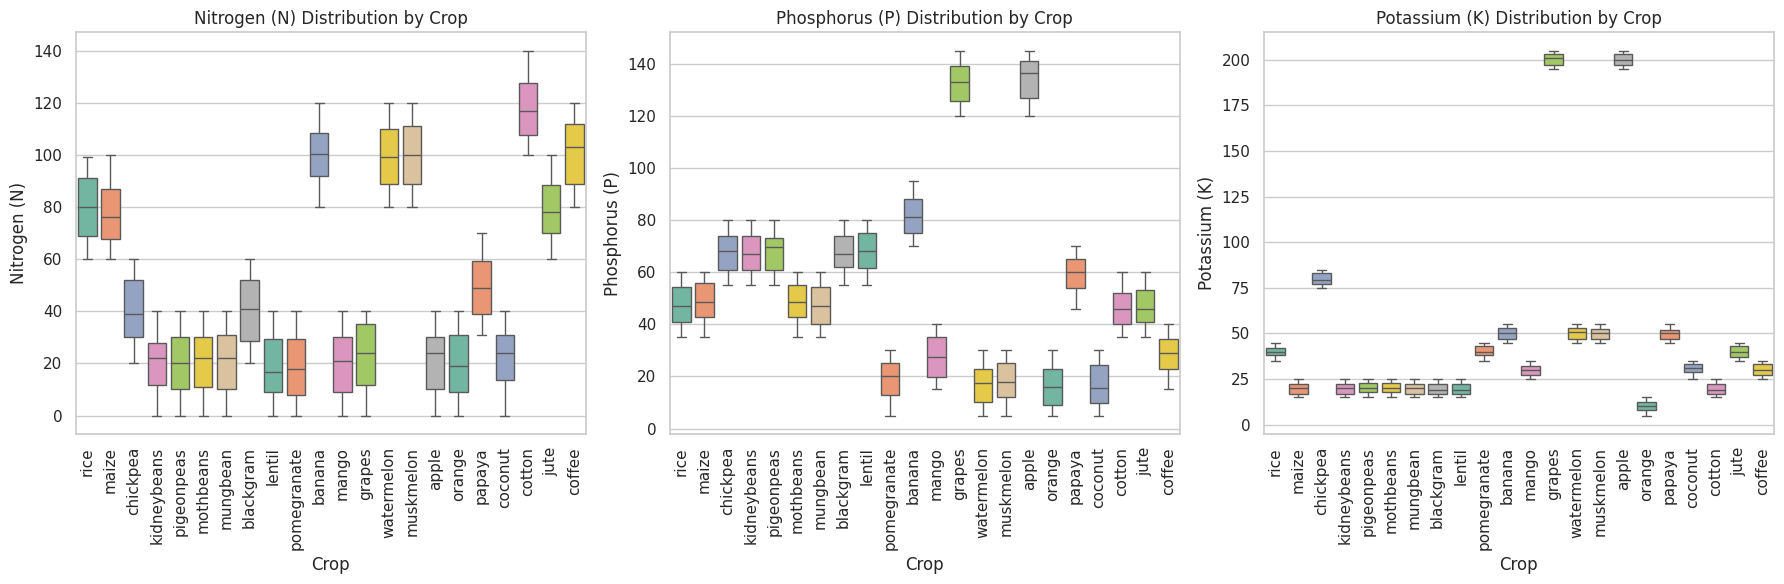

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots to show the distribution of Nitrogen, Phosphorus, and Potassium
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Nitrogen (N)
sns.boxplot(ax=axes[0], x='label', y='N', data=df, hue="label",palette="Set2")
axes[0].set_title('Nitrogen (N) Distribution by Crop')
axes[0].set_xlabel('Crop')
axes[0].set_ylabel('Nitrogen (N)')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Phosphorus (P)
sns.boxplot(ax=axes[1], x='label', y='P', data=df, hue="label",palette="Set2")
axes[1].set_title('Phosphorus (P) Distribution by Crop')
axes[1].set_xlabel('Crop')
axes[1].set_ylabel('Phosphorus (P)')
axes[1].tick_params(axis='x', rotation=90)

# Plot for Potassium (K)
sns.boxplot(ax=axes[2], x='label', y='K', data=df, hue="label",palette="Set2")
axes[2].set_title('Potassium (K) Distribution by Crop')
axes[2].set_xlabel('Crop')
axes[2].set_ylabel('Potassium (K)')
axes[2].tick_params(axis='x', rotation=90)

# Display the plots
plt.tight_layout()
plt.show()


## Correlation Heatmap

Correlation heatmap for the environmental factors in the dataset. It displays the relationships between nitrogen, phosphorus, potassium, temperature, humidity, pH, and rainfall. Values closer to 1 indicate a strong positive correlation, while values closer to -1 show a strong negative correlation.

<Axes: >

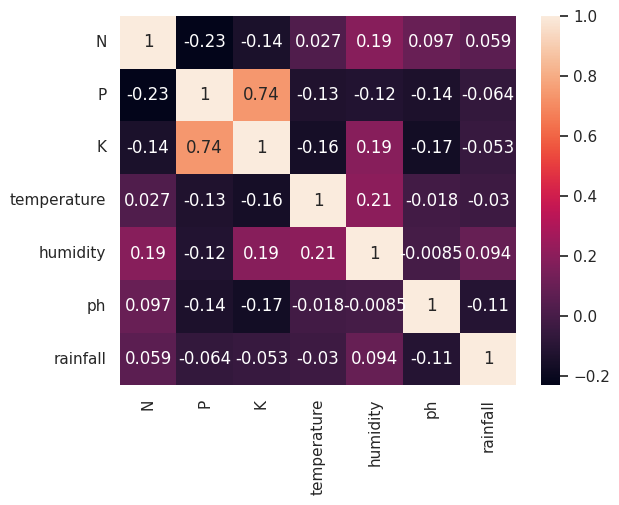

In [ ]:
# Calculate the correlation matrix for the numerical columns
import seaborn as sns
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cbar= True)

## Distribution of crops in the dataset

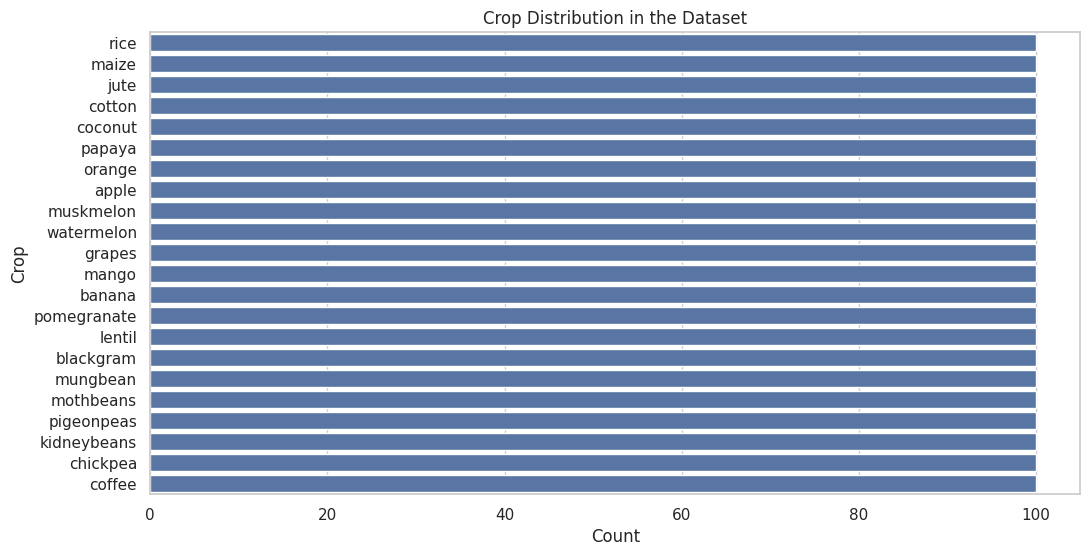

In [ ]:
# Create a bar plot to visualize the distribution of crops in the dataset
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title('Crop Distribution in the Dataset')
plt.xlabel('Count')
plt.ylabel('Crop')
plt.show()


# Temperature and Humidity vs Crop:

Scatter plot of temperature and humidity colored by crop type to visualize how crops cluster based on these factors.

scatter plot where each crop is color-coded, showing how crops cluster based on temperature and humidity conditions.

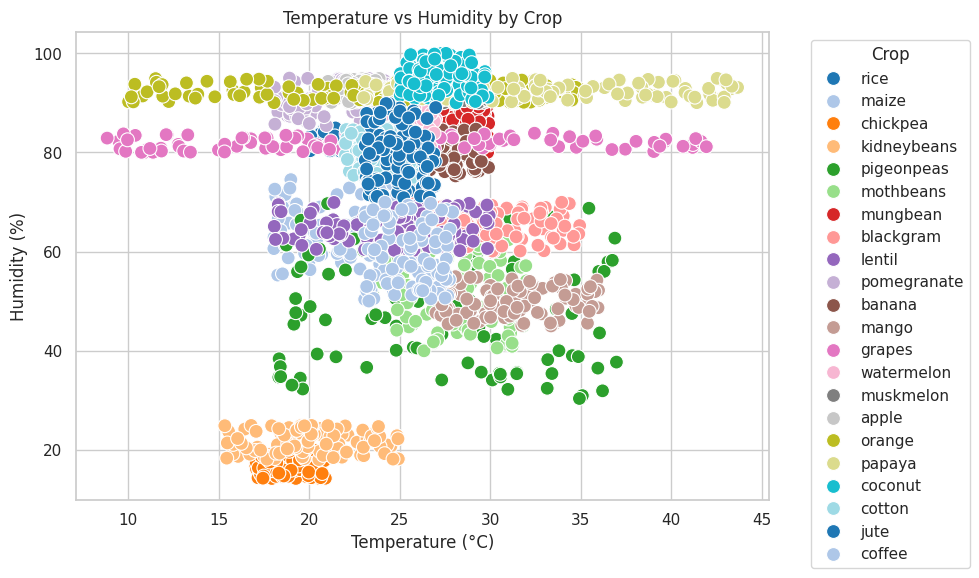

In [ ]:
# scatter plot

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot for Temperature and Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='humidity', hue='label', palette='tab20', s=100)

# Add plot titles and labels
plt.title('Temperature vs Humidity by Crop')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


# Rainfall and pH for Crop Suitability:

Plot rainfall against pH to see how crops vary with these conditions.

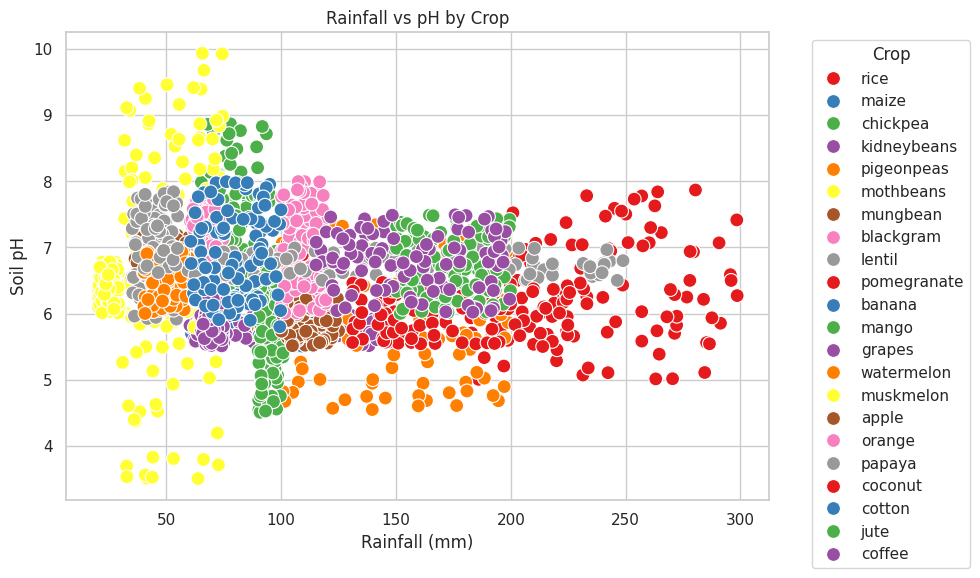

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot for Rainfall and pH levels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rainfall', y='ph', hue='label', palette='Set1', s=100)

# Add plot titles and labels
plt.title('Rainfall vs pH by Crop')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Soil pH')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


## Feature Selection
Use the features such as N, P, K, temperature, humidity, pH, and rainfall as input.
The label (crop) will be your target variable to predict.

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

## Model Selection

In [ ]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn import metrics

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

report = classification_report(y_test, predicted_values)
print("\nClassification Report:\n", report)


DecisionTrees's Accuracy is:  90.0

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

report = classification_report(y_test, predicted_values)
print("\nClassification Report:\n", report)


Naive Bayes's Accuracy is:  0.990909090909091

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      oran

In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

report = classification_report(y_test, predicted_values)
print("\nClassification Report:\n", report)

SVM's Accuracy is:  0.10681818181818181

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

report = classification_report(y_test, predicted_values)
print("\nClassification Report:\n", report)

Logistic Regression's Accuracy is:  0.9522727272727273

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

report = classification_report(y_test, predicted_values)
print("\nClassification Report:\n", report)

RF's Accuracy is:  0.990909090909091

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       

<ipython-input-60-c1f2ecd26231>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')



Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

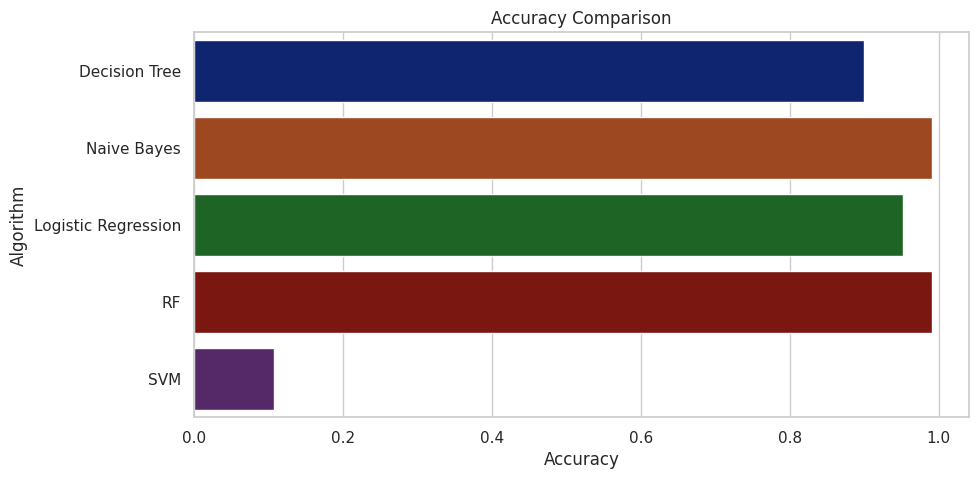

In [ ]:
# Accuracy Comparison
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

report = classification_report(y_test, predicted_values)
print("\nClassification Report:\n", report)

## Making a prediction

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Potential Improvements
* Hyperparameter Tuning: Use techniques like Grid Search or Randomized Search to fine-tune the model.
* Feature Engineering: Include additional features (if available) or combine features to create new variables.